#LEVEL 1

Enter the stock name: audi
Enter stock prices separated by spaces: 34 56 78 89 90 56 78 

Stock Name: audi

Day | Price | Span | Comparison
----------------------------------------
  1 |  34.0 |    1 | N/A
  2 |  56.0 |    2 | Increased
  3 |  78.0 |    3 | Increased
  4 |  89.0 |    4 | Increased
  5 |  90.0 |    5 | Increased
  6 |  56.0 |    1 | Decreased
  7 |  78.0 |    2 | Increased

Predicted Trend: Decrease


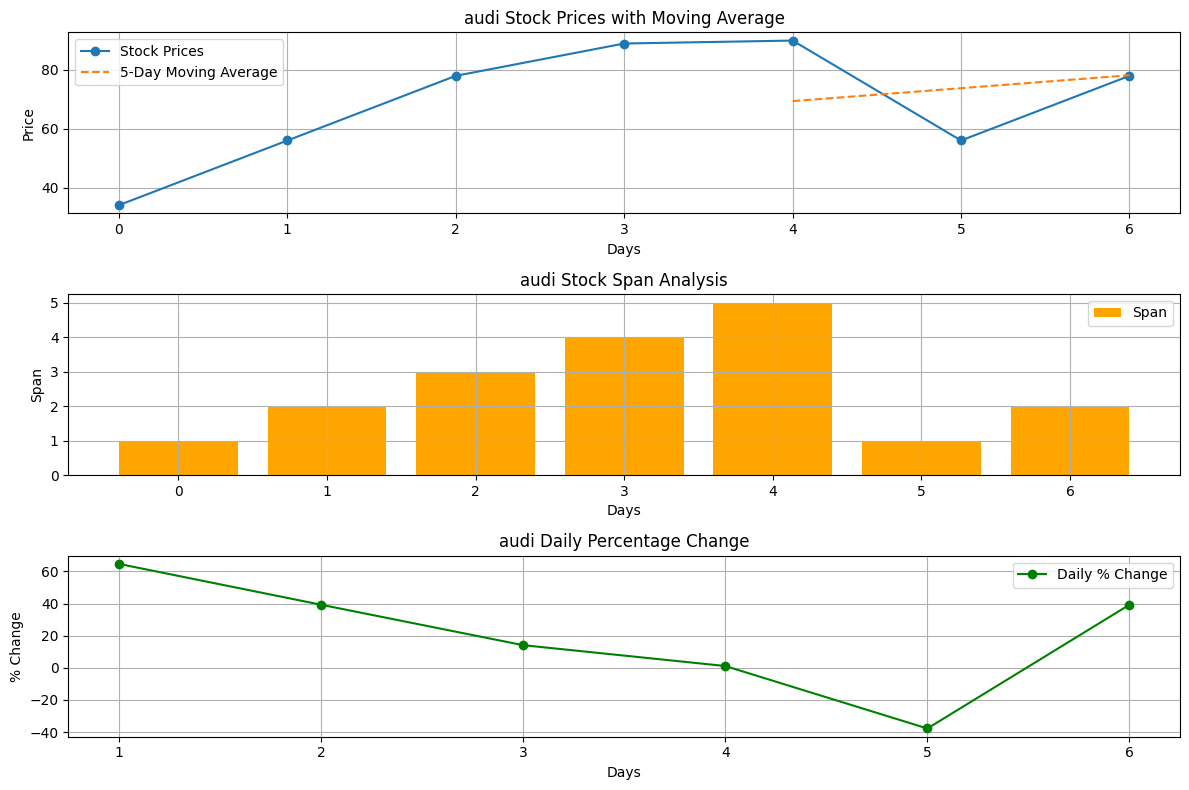

In [ ]:
from collections import deque
import matplotlib.pyplot as plt

def calculate_span(prices):
    n = len(prices)
    spans = [0] * n
    stack = deque()

    for i in range(n):
        while stack and prices[stack[-1]] <= prices[i]:
            stack.pop()
        spans[i] = i + 1 if not stack else i - stack[-1]
        stack.append(i)

    return spans

def calculate_moving_average(prices, days):
    moving_averages = []
    for i in range(len(prices)):
        if i < days - 1:
            moving_averages.append(None)  # Not enough data for moving average
        else:
            avg = sum(prices[i - days + 1:i + 1]) / days
            moving_averages.append(avg)
    return moving_averages

def calculate_daily_percentage_change(prices):
    pct_changes = [None]  # First day has no previous price to compare
    for i in range(1, len(prices)):
        pct_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        pct_changes.append(round(pct_change, 2))
    return pct_changes

def predict_next_day_trend(prices):
    # Simple prediction based on 3-day and 5-day moving averages
    if len(prices) < 5:
        return "Not enough data for prediction"

    short_term_avg = sum(prices[-3:]) / 3
    long_term_avg = sum(prices[-5:]) / 5

    if short_term_avg > long_term_avg:
        return "Predicted Trend: Increase"
    elif short_term_avg < long_term_avg:
        return "Predicted Trend: Decrease"
    else:
        return "Predicted Trend: No Change"

def plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)  # Price plot
    plt.plot(prices, marker='o', label='Stock Prices')
    plt.plot(moving_averages, label='5-Day Moving Average', linestyle='--')
    plt.title(f'{stock_name} Stock Prices with Moving Average')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)  # Span plot
    plt.bar(range(len(spans)), spans, color='orange', label='Span')
    plt.title(f'{stock_name} Stock Span Analysis')
    plt.xlabel('Days')
    plt.ylabel('Span')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)  # Daily percentage change plot
    plt.plot(pct_changes, color='green', marker='o', label='Daily % Change')
    plt.title(f'{stock_name} Daily Percentage Change')
    plt.xlabel('Days')
    plt.ylabel('% Change')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    stock_name = input("Enter the stock name: ")

    prices_input = input("Enter stock prices separated by spaces: ")
    try:
        prices = list(map(float, prices_input.split()))
    except ValueError:
        print("Invalid input. Please enter numbers only.")
        return

    spans = calculate_span(prices)
    moving_averages = calculate_moving_average(prices, 5)
    pct_changes = calculate_daily_percentage_change(prices)
    prediction = predict_next_day_trend(prices)

    print(f"\nStock Name: {stock_name}\n")
    print("Day | Price | Span | Comparison")
    print("-" * 40)

    for i in range(len(prices)):
        # Daily price comparison
        if i == 0:
            comparison = "N/A"  # No comparison for the first day
        else:
            if prices[i] > prices[i - 1]:
                comparison = "Increased"
            elif prices[i] < prices[i - 1]:
                comparison = "Decreased"
            else:
                comparison = "No Change"
        print(f"{i+1:>3} | {prices[i]:>5} | {spans[i]:>4} | {comparison}")

    print("\n" + prediction)
    plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes)

if __name__ == "__main__":
    main()


#LEVEL 2

Enter the stock name: bmw
Enter stock prices separated by spaces: 23 56 78 90 56 79

Stock Name: bmw

Day | Price | Span | Comparison | 5-Day MA | % Change
------------------------------------------------------------
  1 |  23.0 |    1 |        N/A |     N/A |      N/A
  2 |  56.0 |    2 |  Increased |     N/A |   143.48
  3 |  78.0 |    3 |  Increased |     N/A |    39.29
  4 |  90.0 |    4 |  Increased |     N/A |    15.38
  5 |  56.0 |    1 |  Decreased |    60.6 |   -37.78
  6 |  79.0 |    2 |  Increased |    71.8 |    41.07

Predicted Trend: Increase


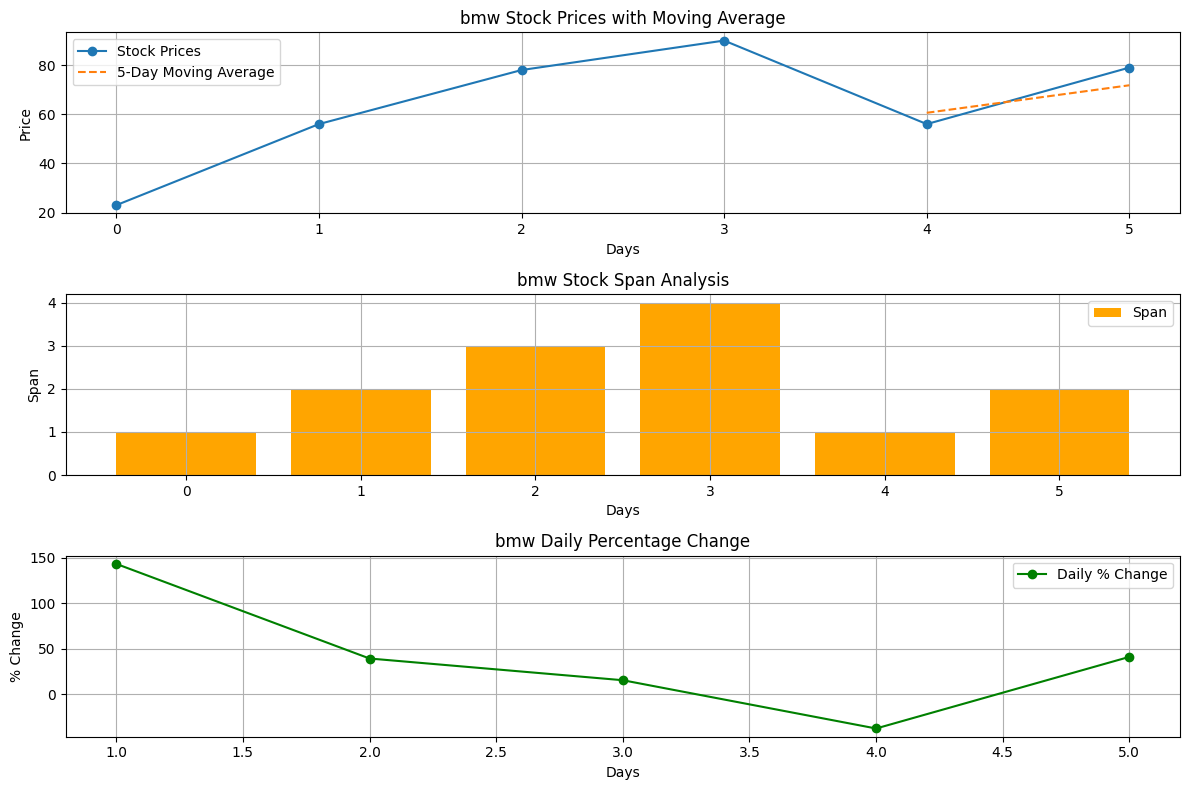

In [ ]:
from collections import deque
import matplotlib.pyplot as plt

def calculate_span(prices):
    n = len(prices)
    spans = [0] * n
    stack = deque()

    for i in range(n):
        while stack and prices[stack[-1]] <= prices[i]:
            stack.pop()
        spans[i] = i + 1 if not stack else i - stack[-1]
        stack.append(i)

    return spans

def calculate_moving_average(prices, days):
    moving_averages = []
    for i in range(len(prices)):
        if i < days - 1:
            moving_averages.append(None)  # Not enough data for moving average
        else:
            avg = sum(prices[i - days + 1:i + 1]) / days
            moving_averages.append(round(avg, 2))
    return moving_averages

def calculate_daily_percentage_change(prices):
    pct_changes = [None]  # First day has no previous price to compare
    for i in range(1, len(prices)):
        pct_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        pct_changes.append(round(pct_change, 2))
    return pct_changes

def predict_next_day_trend(prices):
    # Simple prediction based on 3-day and 5-day moving averages
    if len(prices) < 5:
        return "Not enough data for prediction"

    short_term_avg = sum(prices[-3:]) / 3
    long_term_avg = sum(prices[-5:]) / 5

    if short_term_avg > long_term_avg:
        return "Predicted Trend: Increase"
    elif short_term_avg < long_term_avg:
        return "Predicted Trend: Decrease"
    else:
        return "Predicted Trend: No Change"

def plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)  # Price plot
    plt.plot(prices, marker='o', label='Stock Prices')
    plt.plot(moving_averages, label='5-Day Moving Average', linestyle='--')
    plt.title(f'{stock_name} Stock Prices with Moving Average')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)  # Span plot
    plt.bar(range(len(spans)), spans, color='orange', label='Span')
    plt.title(f'{stock_name} Stock Span Analysis')
    plt.xlabel('Days')
    plt.ylabel('Span')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)  # Daily percentage change plot
    plt.plot(pct_changes, color='green', marker='o', label='Daily % Change')
    plt.title(f'{stock_name} Daily Percentage Change')
    plt.xlabel('Days')
    plt.ylabel('% Change')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    stock_name = input("Enter the stock name: ")

    prices_input = input("Enter stock prices separated by spaces: ")
    try:
        prices = list(map(float, prices_input.split()))
    except ValueError:
        print("Invalid input. Please enter numbers only.")
        return

    spans = calculate_span(prices)
    moving_averages = calculate_moving_average(prices, 5)
    pct_changes = calculate_daily_percentage_change(prices)
    prediction = predict_next_day_trend(prices)

    print(f"\nStock Name: {stock_name}\n")
    print("Day | Price | Span | Comparison | 5-Day MA | % Change")
    print("-" * 60)

    for i in range(len(prices)):
        # Daily price comparison
        if i == 0:
            comparison = "N/A"  # No comparison for the first day
        else:
            if prices[i] > prices[i - 1]:
                comparison = "Increased"
            elif prices[i] < prices[i - 1]:
                comparison = "Decreased"
            else:
                comparison = "No Change"

        # Displaying data per day
        ma = moving_averages[i] if moving_averages[i] is not None else "N/A"
        pct_change = pct_changes[i] if pct_changes[i] is not None else "N/A"
        print(f"{i+1:>3} | {prices[i]:>5} | {spans[i]:>4} | {comparison:>10} | {ma:>7} | {pct_change:>8}")

    print("\n" + prediction)
    plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes)

if __name__ == "__main__":
    main()



# LEVEL 3 - FINAL

Enter the stock name: bmw
Enter stock prices separated by spaces: 45 67 89 90 34 98 53 43

Stock Name: bmw

Day | Price | Span | Comparison | 5-Day MA | % Change
------------------------------------------------------------
  1 |  45.0 |    1 |        N/A |     N/A |      N/A
  2 |  67.0 |    2 |  Increased |     N/A |    48.89
  3 |  89.0 |    3 |  Increased |     N/A |    32.84
  4 |  90.0 |    4 |  Increased |     N/A |     1.12
  5 |  34.0 |    1 |  Decreased |    65.0 |   -62.22
  6 |  98.0 |    6 |  Increased |    75.6 |   188.24
  7 |  53.0 |    1 |  Decreased |    72.8 |   -45.92
  8 |  43.0 |    1 |  Decreased |    63.6 |   -18.87

Predicted Trend: Increase


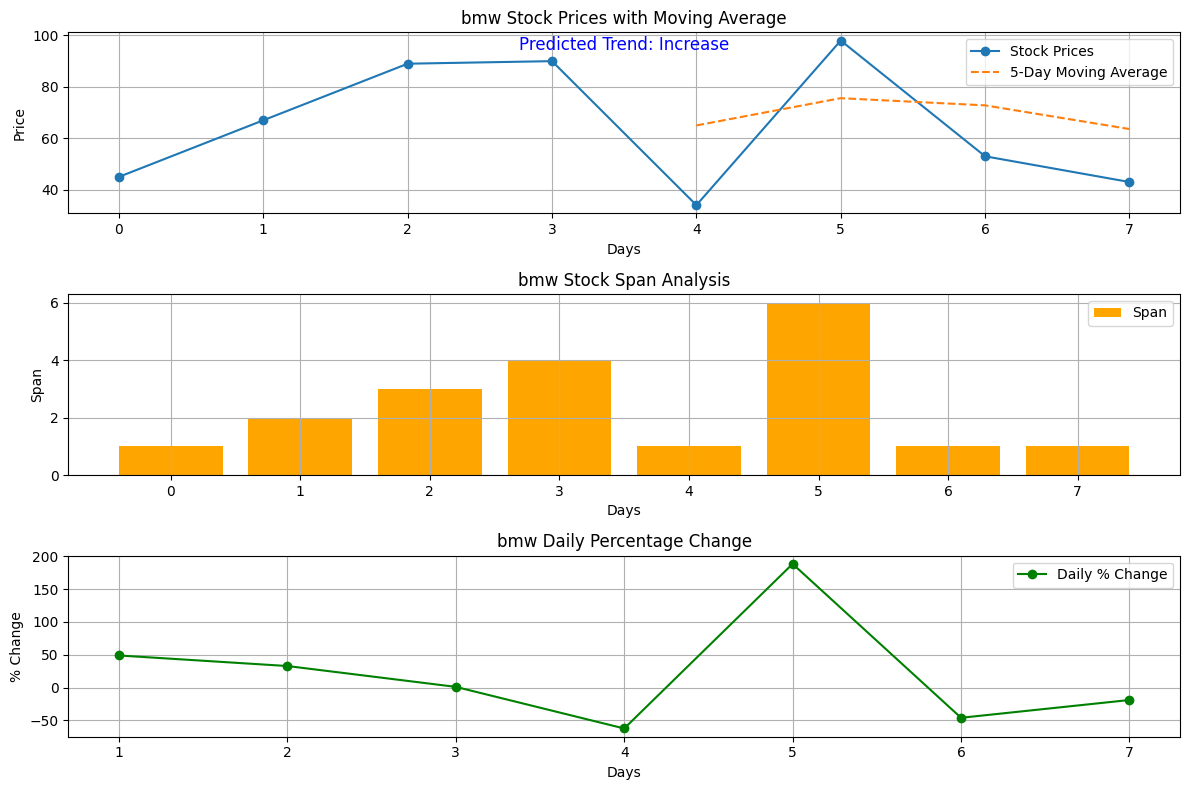

In [ ]:
from collections import deque
import matplotlib.pyplot as plt

def calculate_span(prices):
    n = len(prices)
    spans = [0] * n
    stack = deque()

    for i in range(n):
        while stack and prices[stack[-1]] <= prices[i]:
            stack.pop()
        spans[i] = i + 1 if not stack else i - stack[-1]
        stack.append(i)

    return spans

def calculate_moving_average(prices, days):
    moving_averages = []
    for i in range(len(prices)):
        if i < days - 1:
            moving_averages.append(None)
        else:
            avg = sum(prices[i - days + 1:i + 1]) / days
            moving_averages.append(round(avg, 2))
    return moving_averages

def calculate_daily_percentage_change(prices):
    pct_changes = [None]
    for i in range(1, len(prices)):
        pct_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        pct_changes.append(round(pct_change, 2))
    return pct_changes

def predict_next_day_trend(prices):
    if len(prices) < 5:
        return "Not enough data for prediction"

    short_term_avg = sum(prices[-3:]) / 3
    long_term_avg = sum(prices[-5:]) / 5

    if short_term_avg > long_term_avg:
        return "Predicted Trend: Increase"
    elif short_term_avg < long_term_avg:
        return "Predicted Trend: Decrease"
    else:
        return "Predicted Trend: No Change"

def plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes, prediction):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(prices, marker='o', label='Stock Prices')
    plt.plot(moving_averages, label='5-Day Moving Average', linestyle='--')
    plt.title(f'{stock_name} Stock Prices with Moving Average')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    plt.annotate(prediction, xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='blue')

    plt.subplot(3, 1, 2)
    plt.bar(range(len(spans)), spans, color='orange', label='Span')
    plt.title(f'{stock_name} Stock Span Analysis')
    plt.xlabel('Days')
    plt.ylabel('Span')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(pct_changes, color='green', marker='o', label='Daily % Change')
    plt.title(f'{stock_name} Daily Percentage Change')
    plt.xlabel('Days')
    plt.ylabel('% Change')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    stock_name = input("Enter the stock name: ")

    prices_input = input("Enter stock prices separated by spaces: ")
    try:
        prices = list(map(float, prices_input.split()))
    except ValueError:
        print("Invalid input. Please enter numbers only.")
        return

    spans = calculate_span(prices)
    moving_averages = calculate_moving_average(prices, 5)
    pct_changes = calculate_daily_percentage_change(prices)
    prediction = predict_next_day_trend(prices)

    print(f"\nStock Name: {stock_name}\n")
    print("Day | Price | Span | Comparison | 5-Day MA | % Change")
    print("-" * 60)

    for i in range(len(prices)):
        if i == 0:
            comparison = "N/A"
        else:
            if prices[i] > prices[i - 1]:
                comparison = "Increased"
            elif prices[i] < prices[i - 1]:
                comparison = "Decreased"
            else:
                comparison = "No Change"

        ma = moving_averages[i] if moving_averages[i] is not None else "N/A"
        pct_change = pct_changes[i] if pct_changes[i] is not None else "N/A"
        print(f"{i+1:>3} | {prices[i]:>5} | {spans[i]:>4} | {comparison:>10} | {ma:>7} | {pct_change:>8}")

    print("\n" + prediction)
    plot_stock_data(prices, spans, stock_name, moving_averages, pct_changes, prediction)

if __name__ == "__main__":
    main()


# **Featurers**
  > using deque instead of list
  >> creating a table with the
     -- comparison
     -- moving average
     -- percentage change
 >>> using matplotlib to plot ma, span, daily percentage
 >>>> predicting the increase or decrease in price based on previous prices(Main)